In [2]:
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import units as u
import healpy as hp
from ligo.skymap.io import fits
import ligo.skymap.plot
from ligo.skymap.postprocess import find_greedy_credible_levels
from matplotlib.path import Path
from matplotlib import pyplot as plt
import numpy as np

In [3]:
m, metadata = fits.read_sky_map('/home/n/Documents/Research/GW-Localization-Tiling/data/design_bns_astro/130.fits', nest=None)
nside = hp.npix2nside(len(m))
ipix = np.argmax(m)
lon, lat = hp.pix2ang(nside, ipix, nest=True, lonlat=True)*u.deg
# Optional: recenter the map to center skymap in inset:
# lat -= 1*u.deg
# lon += 3.5*u.deg
center = SkyCoord(lon, lat)

In [4]:
thetas, phis = hp.vec2ang(np.array([[ 0.27629033, -0.94739178,  0.16159353],
 [ 0.29091321, -0.91744749,  0.27140303],
 [ 0.30336673, -0.87494824,  0.37740457],
 [ 0.37458993, -0.81655554,  0.43922594],
 [ 0.38307979, -0.898994  ,  0.21227263],
 [ 0.39825468, -0.85857095,  0.32287634],
 [ 0.47087546, -0.79603846,  0.38026185]]))

ras = np.rad2deg(phis)
decs = np.rad2deg(0.5 * np.pi - thetas)

point_coords = zip(ras, decs)

In [5]:
print(list(point_coords))

[(286.25840595307153, 9.299402509195529), (287.59328854093235, 15.747772397174584), (289.12272758165903, 22.173008068475262), (294.64300505722855, 26.054503605901164), (293.0798489071903, 12.255567463549399), (294.88458731781583, 18.83696325527838), (300.60531236975385, 22.349903151802526)]


In [6]:
cls = 100 * find_greedy_credible_levels(m)

In [7]:
print(cls)

[100.         100.         100.         ...  99.99867048  99.99866623
  99.99866625]


/home/n/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/n/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/n/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/n/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/n/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACT

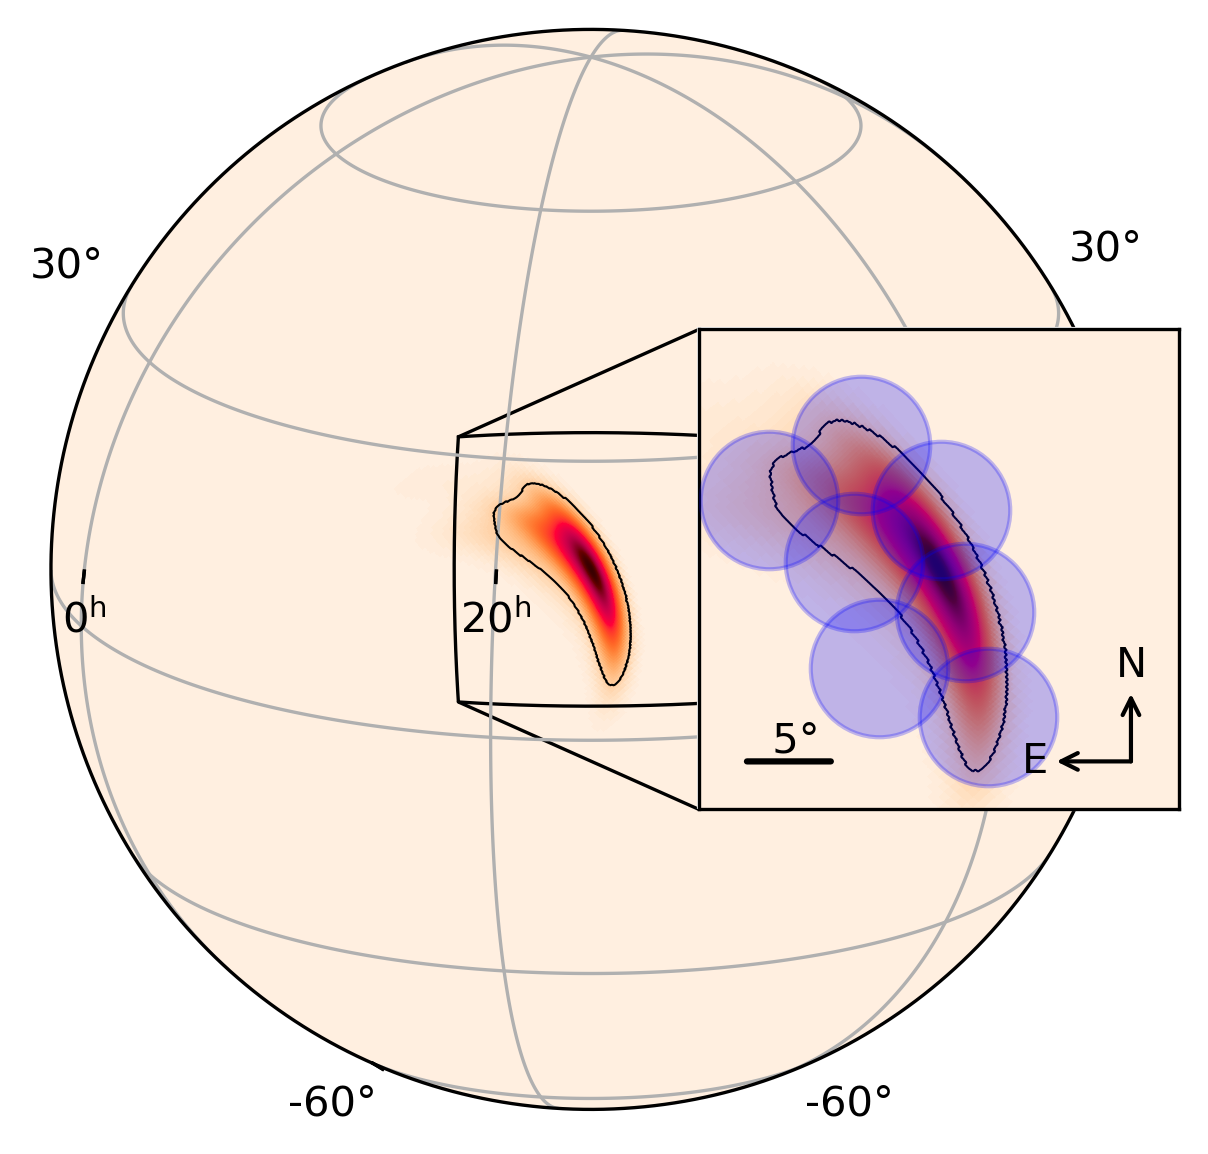

In [5]:
fig = plt.figure(figsize=(4, 4), dpi=300)

ax = plt.axes(
    [0.05, 0.05, 0.9, 0.9],
    projection='astro globe',
    center=center)

ax_inset = plt.axes(
    [0.59, 0.3, 0.4, 0.4],
    projection='astro zoom',
    center=center,
    radius=15*u.deg)

for key in ['ra', 'dec']:
    ax_inset.coords[key].set_ticklabel_visible(False)
    ax_inset.coords[key].set_ticks_visible(False)
ax.coords['ra'].set_ticks(spacing=60*u.deg)
ax.grid()
ax.mark_inset_axes(ax_inset)
ax.connect_inset_axes(ax_inset, 'upper left')
ax.connect_inset_axes(ax_inset, 'lower left')
ax_inset.scalebar((0.1, 0.1), 5 * u.deg).label()
ax_inset.compass(0.9, 0.1, 0.2)

ax.imshow_hpx(m, cmap='cylon', nested=True)
ax.contour_hpx((cls, 'ICRS'), nested=metadata['nest'], colors='k', linewidths=0.5, levels=[90])
ax_inset.imshow_hpx(m, cmap='cylon', nested=True)
ax_inset.contour_hpx((cls, 'ICRS'), nested=metadata['nest'], colors='k', linewidths=0.5, levels=[90])

for coord in point_coords:
    ax_inset.plot(
        coord[0], coord[1],
        transform=ax_inset.get_transform('world'),
        marker=Path.circle(),
        markersize=33,
        alpha=0.25,
        color='blue')

plt.savefig('coverage_example_2_hex.pdf', dpi=300, bbox_inches='tight')